In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

In [168]:
df = pd.read_csv("../data/data_processed.csv")
prod_columns = [ 'fve', 'mve','wpg']
usage_columns = ['shops', 'office_building', 'industrial_park']
df[usage_columns] = df[usage_columns].abs()
df[prod_columns] = df[prod_columns].abs()
df['fve'] = df['fve'].fillna(df['fve'].mean())
df['mve'] = df['mve'].fillna(df['mve'].mean())
df['wpg'] = df['wpg'].fillna(df['wpg'].mean())
df['industrial_park'].loc[30350:] = np.flip(df['industrial_park'][30350-4690:30350:].values)
df['wpg'].loc[30620:] = np.multiply(np.flip(df['wpg'][30620-4420:30620:].values),1.2)
df['fve'].loc[30000:] = np.multiply(df['fve'][30000-5040:30000:].values,0.8)
df['mve'].loc[25000:29999] = df['mve'][19999:24999].values
df['consumption_usage'] = df['shops'] + df['office_building'] + df['industrial_park']
df['production_usage'] = df['fve'] + df['mve'] + df['wpg']
#4690

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               35040 non-null  object 
 1   shops              35040 non-null  float64
 2   office_building    35040 non-null  float64
 3   industrial_park    35040 non-null  float64
 4   fve                35040 non-null  float64
 5   mve                35040 non-null  float64
 6   wpg                35040 non-null  float64
 7   price              35040 non-null  float64
 8   isWeekend          35040 non-null  int64  
 9   isHoliday          35040 non-null  int64  
 10  production_usage   35040 non-null  float64
 11  consumption_usage  35040 non-null  float64
 12  temp               35040 non-null  float64
 13  wind               35040 non-null  int64  
 14  hour               35040 non-null  int64  
 15  day                35040 non-null  int64  
 16  month              350

In [178]:
df.to_csv("../data/data_processed_cleaned.csv",index=False)

In [171]:
df = pd.read_csv("../data/data_processed_cleaned.csv")

In [177]:
df.describe()

,shops,office_building,industrial_park,fve,mve,wpg,price,isWeekend,isHoliday,production_usage,...,temp,wind,hour,day,month,day_cos,day_sin,timestamp,month_cos,month_sin
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.00000,35040.000000,35040.000000,35040.000000,35040.000000,...,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,3.504000e+04,3.504000e+04,3.504000e+04,35040.000000,35040.000000
mean,73.631045,46.192292,48.935342,789.457449,1273.049700,457.65765,33.982115,0.282192,0.041096,2520.164799,...,8.591712,3.580137,11.500000,15.720548,6.526027,-1.112251e-16,2.707119e-17,1.593677e+09,0.000609,-0.002332
std,70.458993,4.687074,50.899149,1194.661459,810.667483,392.06582,16.437125,0.450073,0.198515,1445.119112,...,8.548222,2.532739,6.922285,8.796373,3.447901,7.071169e-01,7.071169e-01,9.124102e+06,0.708271,0.705957
min,0.036935,0.000000,3.448000,0.000000,0.000000,7.71000,-65.000000,0.000000,0.000000,54.460000,...,-15.500000,0.000000,0.000000,1.000000,1.000000,-1.000000e+00,-1.000000e+00,1.577837e+09,-1.000000,-1.000000
25%,14.736000,42.744000,8.964000,0.000000,620.940000,163.83500,23.860000,0.000000,0.000000,1302.917500,...,1.400000,2.000000,5.750000,8.000000,4.000000,-7.071068e-01,-7.071068e-01,1.585807e+09,-0.707487,-0.707487
50%,32.734000,44.928000,21.120000,7.499280,1024.040000,320.52400,33.010000,0.000000,0.000000,2360.370000,...,8.900000,3.000000,11.500000,16.000000,7.000000,-6.123234e-17,6.123234e-17,1.593691e+09,-0.001075,-0.003584
75%,134.420000,49.296000,90.170000,1316.380320,1820.450000,649.93000,43.040000,1.000000,0.000000,3347.924700,...,15.300000,5.000000,17.250000,23.000000,10.000000,7.071068e-01,7.071068e-01,1.601575e+09,0.712031,0.701382
max,356.208000,87.984000,209.740000,4956.092000,3087.360000,1893.72000,125.100000,1.000000,1.000000,8955.618800,...,31.800000,19.000000,23.000000,31.000000,12.000000,1.000000e+00,1.000000e+00,1.609458e+09,1.000000,1.000000


<AxesSubplot:>

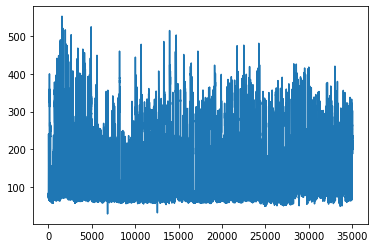

In [173]:
df['consumption_usage'].plot()

<AxesSubplot:>

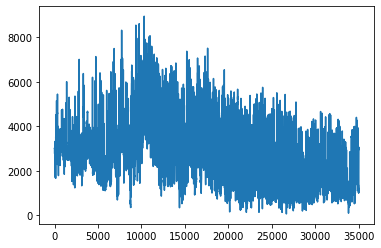

In [174]:
df['production_usage'].plot()

shops


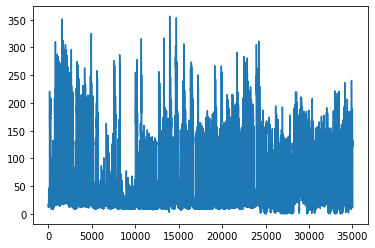

office_building


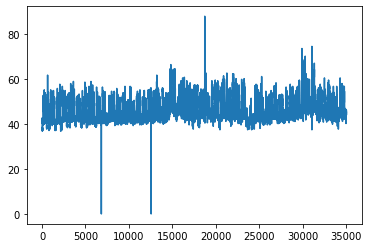

industrial_park


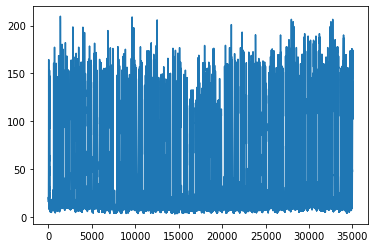

In [175]:
for x in usage_columns:
    print(x)
    df[x].plot()
    plt.show()

fve


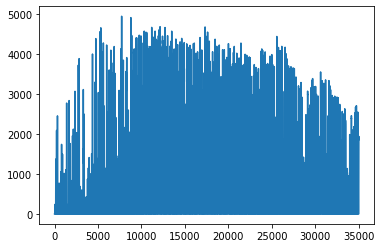

mve


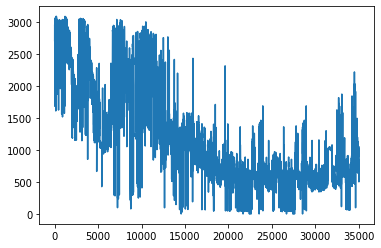

wpg


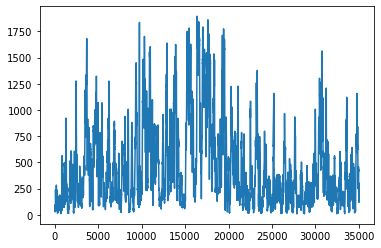

In [176]:
for x in prod_columns:
    print(x)
    df[x].plot()
    plt.show()